In [929]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [930]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [931]:
netflix = pd.read_csv("Netflix Userbase.csv")
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [932]:
#Calculate the plan duration in days
netflix['Join Date'] = pd.to_datetime(netflix['Join Date'], format='%d-%m-%y')
netflix['Last Payment Date'] = pd.to_datetime(netflix['Last Payment Date'], format='%d-%m-%y')
netflix['Duration (days)'] = (netflix['Last Payment Date'] - netflix['Join Date']).dt.days
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days)
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58


In [933]:
#Calculate Total Revenue based on the Plan Duration
netflix['Duration (months)'] = netflix['Duration (days)'] / 30
netflix['Total Revenue'] = netflix['Monthly Revenue'] * netflix['Duration (months)']
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Total Revenue
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,17.033333,170.333333
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,21.833333,327.500000
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,3.966667,47.600000
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,11.700000,140.400000
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,1.933333,19.333333


In [934]:
#Segmenting the data into age groups
bins = [18, 30, 40, 50, 100]
labels = ["18-30", "31-40", "41-50", "51+"]
netflix['Age Group'] = pd.cut(netflix['Age'], bins=bins, labels=labels, right=False)
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Total Revenue,Age Group
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,17.033333,170.333333,18-30
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,21.833333,327.500000,31-40
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,3.966667,47.600000,41-50
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,11.700000,140.400000,51+
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,1.933333,19.333333,31-40


Text(0.5, 1.0, 'Percentage of Each Subscription Type')

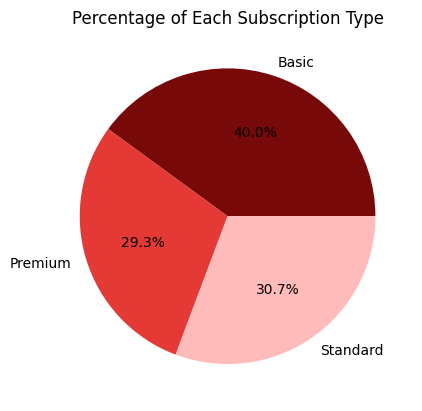

In [935]:
#The number of each type of subscriptions
sub_type=netflix.groupby('Subscription Type').size()
sub_type

rgb_color = ['#780909', '#E53935', '#ffbaba']
plt.pie(sub_type, labels = sub_type.index, colors=rgb_color, autopct='%1.1f%%')
plt.title('Percentage of Each Subscription Type')

Text(0.5, 1.0, 'Difference in Number of Male vs Female')

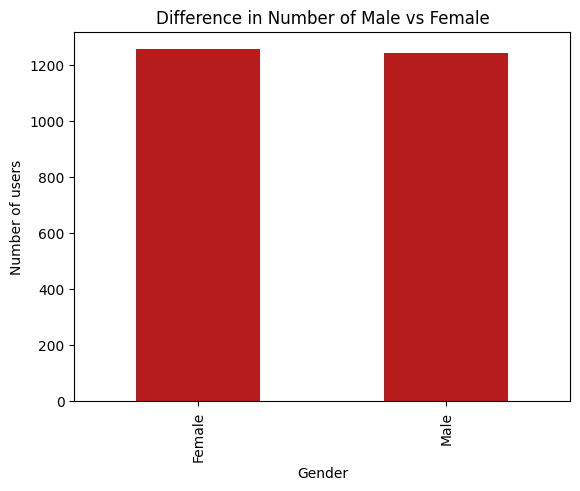

In [936]:
#Number of users that are male or female
gender = netflix.groupby('Gender').size()
gender

gender.plot(x="Gender", y="Number of users", kind="bar", color = '#B71C1C')
plt.xlabel('Gender')
plt.ylabel('Number of users')
plt.title('Difference in Number of Male vs Female')

In [937]:
gender_sub = netflix.groupby(['Gender','Subscription Type'], as_index=False).size()
gender_sub

,Gender,Subscription Type,size
0,Female,Basic,512
1,Female,Premium,364
2,Female,Standard,381
3,Male,Basic,487
4,Male,Premium,369
5,Male,Standard,387


Text(0.5, 1.0, 'Number of Users in Each Country')

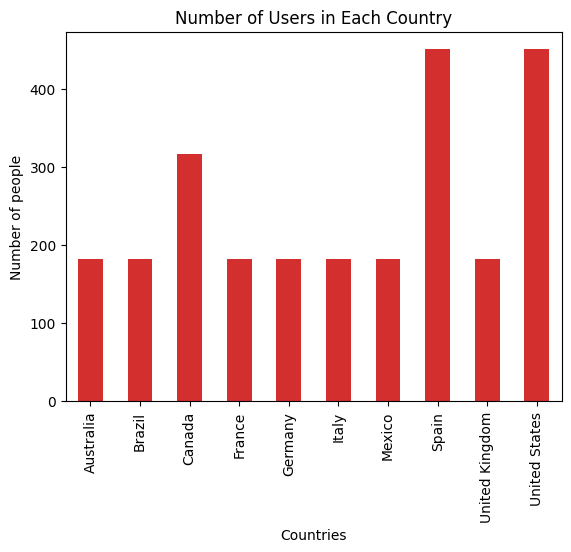

In [938]:
#Number of users in each country
country=netflix.groupby('Country').size()
country

country.plot(x="Coutries", y="Number of users", kind="bar", color = '#D32F2F')
plt.xlabel('Countries')
plt.ylabel('Number of people')
plt.title('Number of Users in Each Country')

In [939]:
import plotly.express as px
# Create a choropleth map showing the number of Netflix users in each country

rgb_color = ['#780909', '#E53935', '#ffbaba']

country_data = netflix.groupby('Country').agg({'User ID': 'count', 'Monthly Revenue': 'sum'}).reset_index()


fig1 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='User ID', title='Number of Netflix Users by Country',
                     hover_name='Country', color_continuous_scale=rgb_color)
fig1.show()

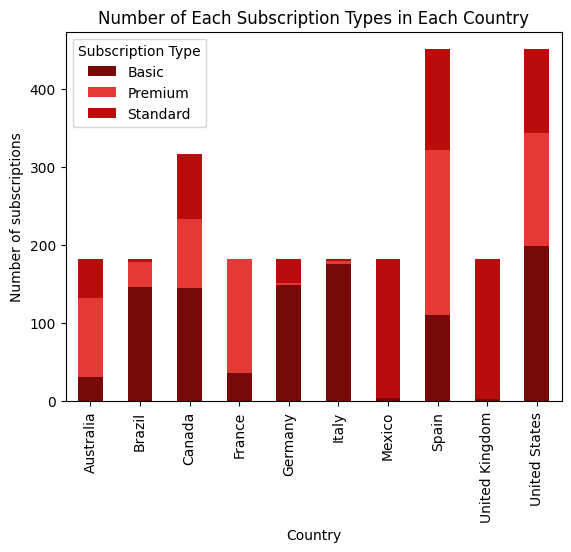

In [940]:
rgb_color = ['#780909', '#E53935', '#BA0C0C']
#Number of users for each subscription types in each country
country_subscription_count = netflix.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()
country_subscription_count.plot(kind = 'bar', stacked = True, color=rgb_color)
plt.xlabel('Country')
plt.ylabel('Number of subscriptions')
plt.title('Number of Each Subscription Types in Each Country')
plt.show()

Text(0.5, 1.0, 'Percentage of Each Device Type')

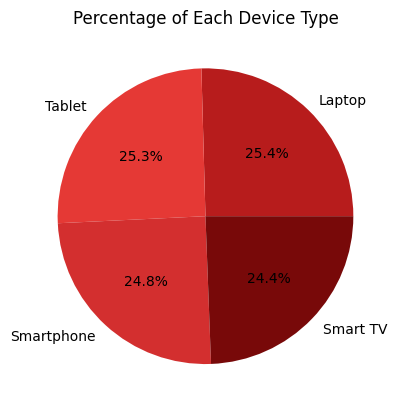

In [941]:
#Device type preferences
device = netflix['Device'].value_counts()
device

rgb_color = ['#B71C1C', '#E53935', '#D32F2F','#780909']
plt.pie(device, labels = device.index, colors=rgb_color, autopct='%1.1f%%')
plt.title('Percentage of Each Device Type')

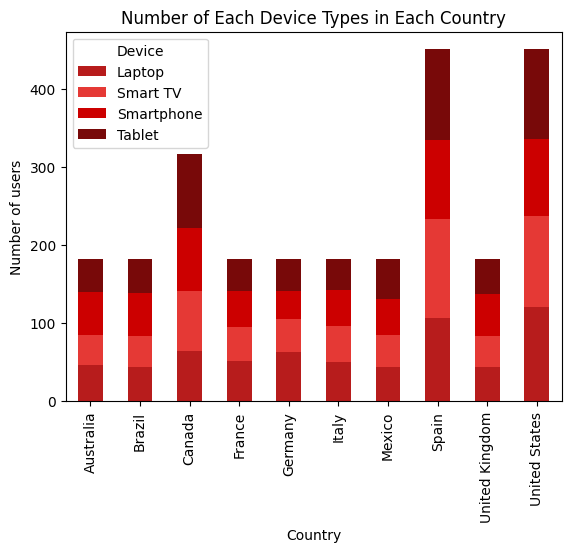

In [942]:
#Number of users for each subscription types in each country
country_device_count = netflix.groupby(['Country', 'Device']).size().unstack()
country_device_count

rgb_color = ['#B71C1C', '#E53935', '#CC0000','#780909']
country_device_count.plot(kind = 'bar', stacked = True, color=rgb_color)
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.title('Number of Each Device Types in Each Country')
plt.show()

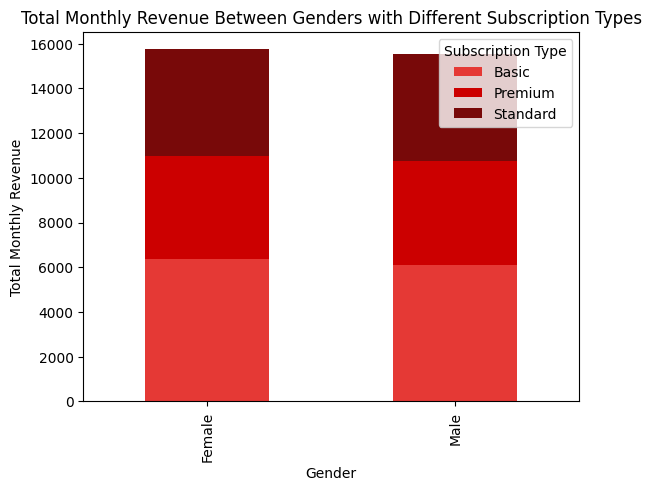

In [943]:
#Difference in total monthly revenue between male and female with different subscription type
gender_revenue = netflix.groupby(['Gender','Subscription Type'])['Monthly Revenue'].sum().unstack().reset_index()
gender_revenue

rgb_color = [ '#E53935', '#CC0000','#780909']
gender_revenue.plot(x='Gender', kind = 'bar', stacked = True, color=rgb_color)
plt.xlabel('Gender')
plt.ylabel('Total Monthly Revenue')
plt.title('Total Monthly Revenue Between Genders with Different Subscription Types')
plt.show()

In [944]:
#Average age by gender
avg_age = netflix.groupby('Gender')['Age'].mean().reset_index()
avg_age

,Gender,Age
0,Female,39.077963
1,Male,38.510056


In [945]:
#Youngest users
min_age= netflix.groupby('Gender')['Age'].min().reset_index()
min_age

,Gender,Age
0,Female,26
1,Male,27


In [946]:
#Oldest Users
max_age= netflix.groupby('Gender')['Age'].max().reset_index()
max_age

,Gender,Age
0,Female,51
1,Male,51


In [947]:
#Total monthly revenue by subscription type
subscription_total_revenue= netflix.groupby('Subscription Type')['Monthly Revenue'].sum()
subscription_total_revenue

Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64

Text(0.5, 1.0, 'Total Monthly Revenue By Subscription Type')

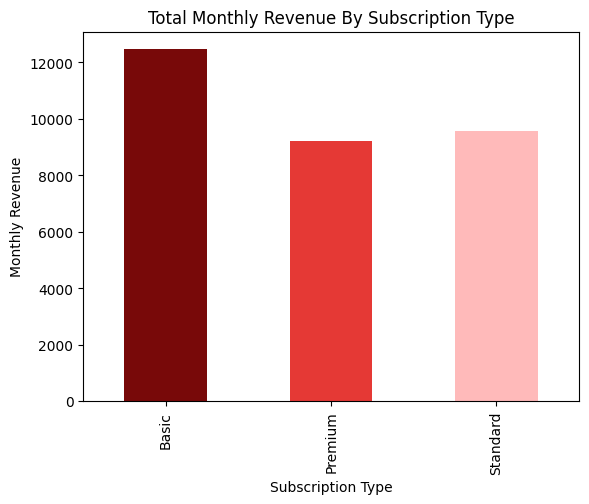

In [948]:
rgb_color = ['#780909', '#E53935', '#ffbaba']
subscription_total_revenue.plot(x = 'Subscription Type', y = 'Monthly Revenue', kind = 'bar', color = rgb_color)
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')
plt.title('Total Monthly Revenue By Subscription Type')

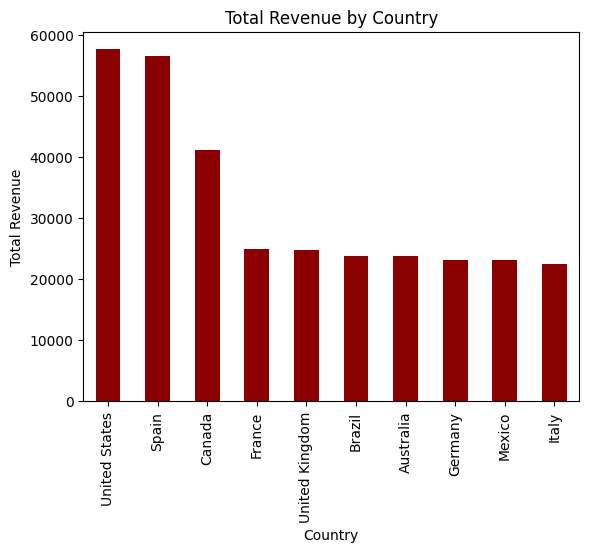

In [949]:
#Revenue by Country
revenue_by_country = netflix.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)

revenue_by_country.plot(kind='bar', color='darkred')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

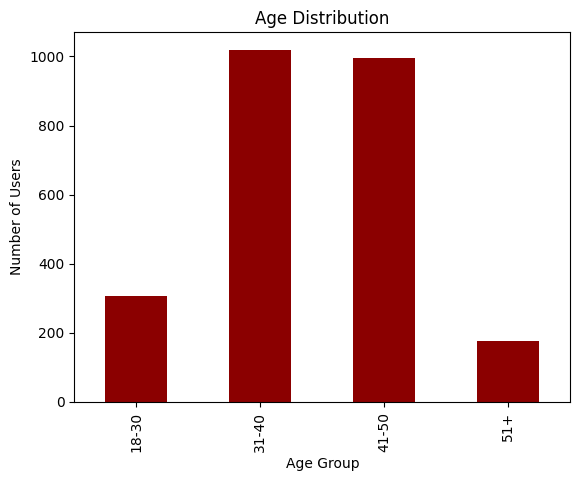

In [950]:
#Age Distribution
count_by_age = netflix.groupby('Age Group').size()
count_by_age.plot(kind='bar', color='darkred')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

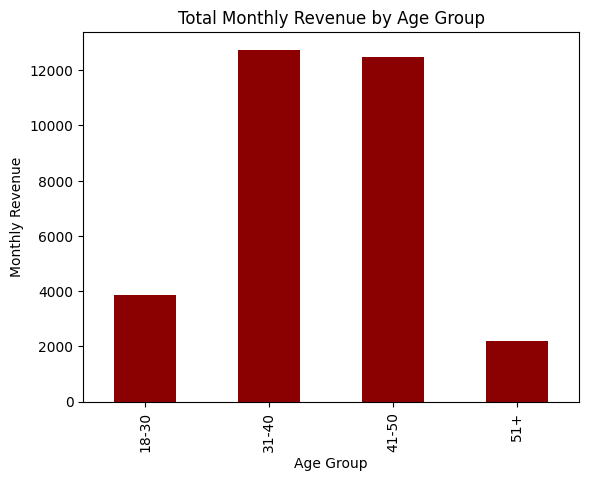

In [951]:
# Average Revenue by Age Group
average_revenue_by_age = netflix.groupby('Age Group')['Monthly Revenue'].sum()
average_revenue_by_age.plot(kind='bar', color='darkred')
plt.title('Total Monthly Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Monthly Revenue')
plt.show()

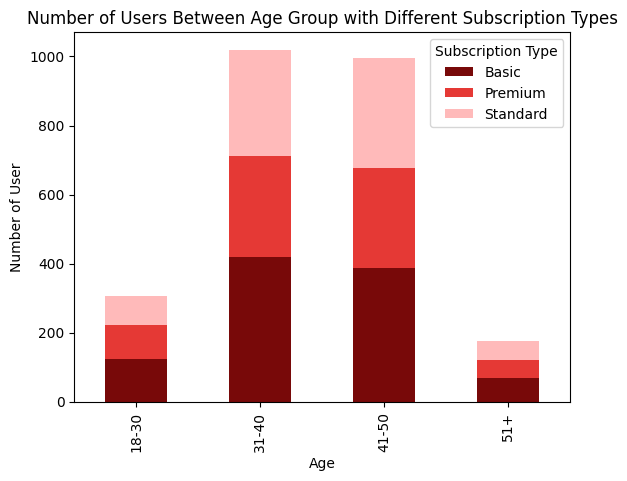

In [952]:
#Total Revenue between age group based on subscriptions
age_revenue = netflix.groupby(['Age Group','Subscription Type']).size().unstack().reset_index()
age_revenue

rgb_color = ['#780909', '#E53935', '#ffbaba']
age_revenue.plot(x='Age Group', kind = 'bar', stacked = True, color=rgb_color)
plt.xlabel('Age')
plt.ylabel('Number of User')
plt.title('Number of Users Between Age Group with Different Subscription Types')
plt.show()

In [953]:
#Calculate the diffrence between the current day and the last payment to see if the user is still active
status = (pd.Timestamp.now() - netflix['Last Payment Date']).dt.days
print(status)

0       184
1       172
2       167
3       168
4       166
       ... 
2495    152
2496    150
2497    149
2498    152
2499    152
Name: Last Payment Date, Length: 2500, dtype: int64


In [954]:
# Calculate the difference in days from the 'Last Payment Date' to now
def user_status(row):
    status = (pd.Timestamp.now() - row['Last Payment Date']).days
    days = (row['Last Payment Date'] - row['Join Date']).days


    if pd.Timestamp.now() < row['Last Payment Date']:
        return "Active"
    elif status <= days:
        return 'Active'
    else:
        return 'Expired'

In [955]:
netflix['User Status'] = netflix.apply(lambda x: user_status(x), axis=1)
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Total Revenue,Age Group,User Status
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,17.033333,170.333333,18-30,Active
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,21.833333,327.500000,31-40,Active
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,3.966667,47.600000,41-50,Expired
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,11.700000,140.400000,51+,Active
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,1.933333,19.333333,31-40,Expired


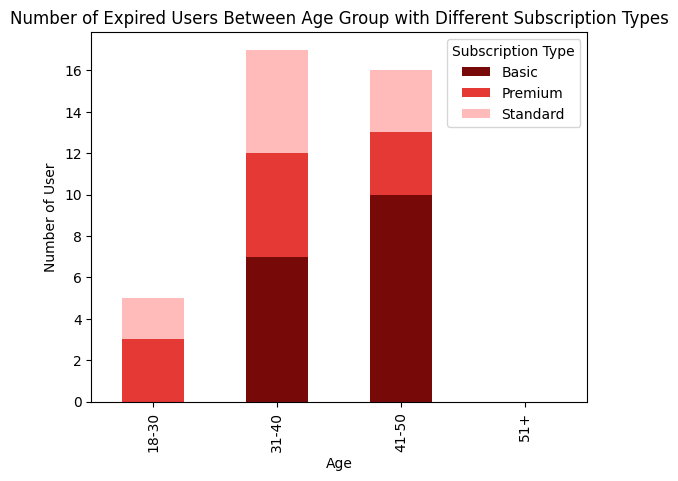

In [956]:
#Number of expired users in each age group based on subscription types
expired_user = netflix[netflix['User Status'] == 'Expired'].groupby(['Age Group','Subscription Type']).size().unstack().reset_index()
expired_user

rgb_color = ['#780909', '#E53935', '#ffbaba']
expired_user.plot(x='Age Group', kind = 'bar', stacked = True, color=rgb_color)
plt.xlabel('Age')
plt.ylabel('Number of User')
plt.title('Number of Expired Users Between Age Group with Different Subscription Types')
plt.show()


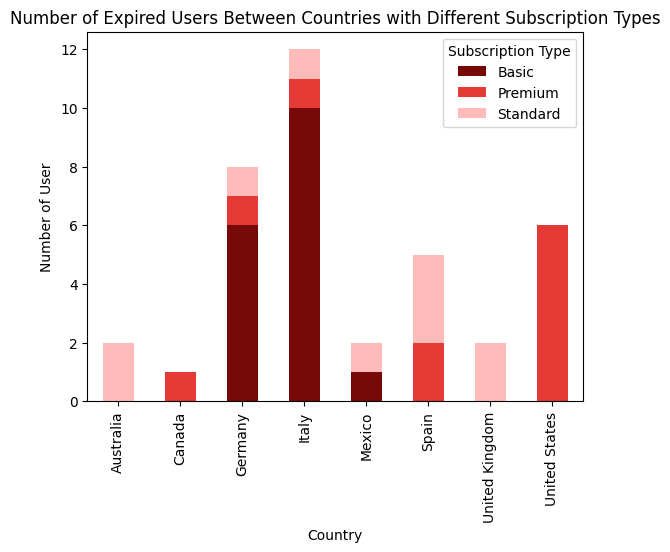

In [957]:
#Number of expired users in each country based on subscription types
country_expired_user = netflix[netflix['User Status'] == 'Expired'].groupby(['Country','Subscription Type']).size().unstack().reset_index()
country_expired_user

rgb_color = ['#780909', '#E53935', '#ffbaba']
country_expired_user.plot(x='Country', kind = 'bar', stacked = True, color=rgb_color)
plt.ylabel('Number of User')
plt.title('Number of Expired Users Between Countries with Different Subscription Types')
plt.show()

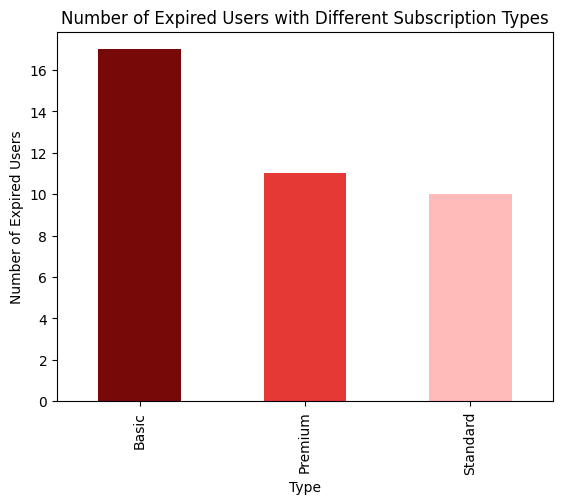

In [958]:
#The number of expired users each type of subscriptions
expired_sub_type=netflix[netflix['User Status'] == 'Expired'].groupby(['Subscription Type']).size()
expired_sub_type

rgb_color = ['#780909', '#E53935', '#ffbaba']
expired_sub_type.plot(x='Subscription Type', kind = 'bar', stacked = True, color=rgb_color)
plt.xlabel('Type')
plt.ylabel('Number of Expired Users')
plt.title('Number of Expired Users with Different Subscription Types')
plt.show()

In [959]:
category = ['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration', 'User Status']

encoded = {}

for col in category:
    label_encoder = LabelEncoder()
    encoded_values = netflix[col].unique()
    label_encoder.fit(encoded_values)
    netflix[col] = label_encoder.transform(netflix[col])
    encoded[col] = dict(zip(label_encoder.transform(encoded_values), encoded_values))

# Print the mapping
for col, mapping in encoded.items():
    print(f"{col} Mapping:")
    print(mapping)

Subscription Type Mapping:
{0: 'Basic', 1: 'Premium', 2: 'Standard'}
Country Mapping:
{9: 'United States', 2: 'Canada', 8: 'United Kingdom', 0: 'Australia', 4: 'Germany', 3: 'France', 1: 'Brazil', 6: 'Mexico', 7: 'Spain', 5: 'Italy'}
Gender Mapping:
{1: 'Male', 0: 'Female'}
Device Mapping:
{2: 'Smartphone', 3: 'Tablet', 1: 'Smart TV', 0: 'Laptop'}
Plan Duration Mapping:
{0: '1 Month'}
User Status Mapping:
{0: 'Active', 1: 'Expired'}


In [960]:
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Total Revenue,Age Group,User Status
0,1,0,10,2022-01-15,2023-06-10,9,28,1,2,0,511,17.033333,170.333333,18-30,0
1,2,1,15,2021-09-05,2023-06-22,2,35,0,3,0,655,21.833333,327.500000,31-40,0
2,3,2,12,2023-02-28,2023-06-27,8,42,1,1,0,119,3.966667,47.600000,41-50,1
3,4,2,12,2022-07-10,2023-06-26,0,51,0,0,0,351,11.700000,140.400000,51+,0
4,5,0,10,2023-05-01,2023-06-28,4,33,1,2,0,58,1.933333,19.333333,31-40,1


Linear Regression to Predict Total Revenue

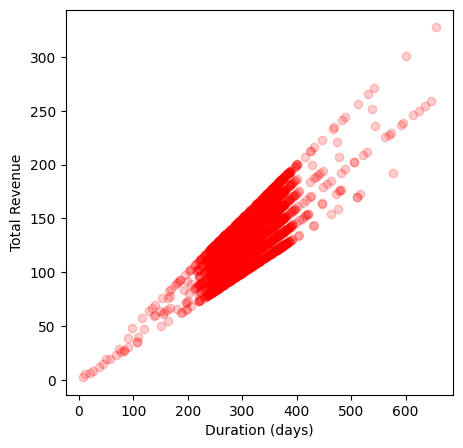

In [961]:
### Correlation
netflix[["Duration (days)", "Total Revenue"]].corr()

#-- Relationship b/t duration in days and total revenue without an intercept
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(netflix["Duration (days)"], netflix["Total Revenue"], color='r', alpha=0.20)
ax.set_xlabel('Duration (days)')
ax.set_ylabel('Total Revenue')
plt.show()

In [962]:
### Statsmodel (No Intercept)
smOLS = sm.OLS(netflix["Total Revenue"], netflix["Duration (days)"]).fit()
print(smOLS.summary())

                                 OLS Regression Results                                
Dep. Variable:          Total Revenue   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.380e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                        0.00
Time:                        03:57:04   Log-Likelihood:                         -10726.
No. Observations:                2500   AIC:                                  2.145e+04
Df Residuals:                    2499   BIC:                                  2.146e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

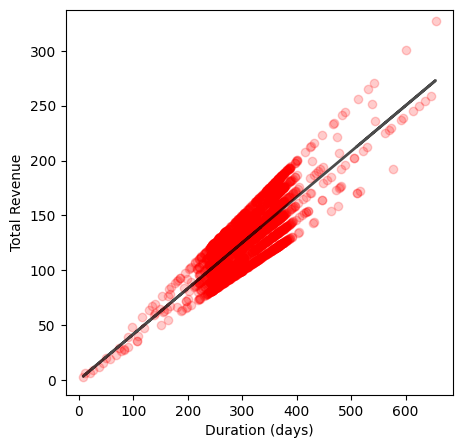

In [963]:
#-- Relationship b/t duration in days and total revenue with an intercept
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(netflix["Duration (days)"], netflix["Total Revenue"], color='r', alpha=0.20)
ax.plot(netflix["Duration (days)"], smOLS.predict(), color='black', alpha=0.70, linewidth=2)
ax.set_xlabel('Duration (days)')
ax.set_ylabel('Total Revenue')
plt.ylim(top=netflix['Total Revenue'].max()+10)
plt.show()

In [964]:
### Statsmodel (With and Without Intercept)
smOLS_int = sm.OLS(netflix["Total Revenue"], sm.add_constant(netflix["Duration (days)"])).fit()
print(smOLS_int.summary())


                            OLS Regression Results                            
Dep. Variable:          Total Revenue   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     5434.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:57:05   Log-Likelihood:                -10726.
No. Observations:                2500   AIC:                         2.146e+04
Df Residuals:                    2498   BIC:                         2.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2059      1.765     

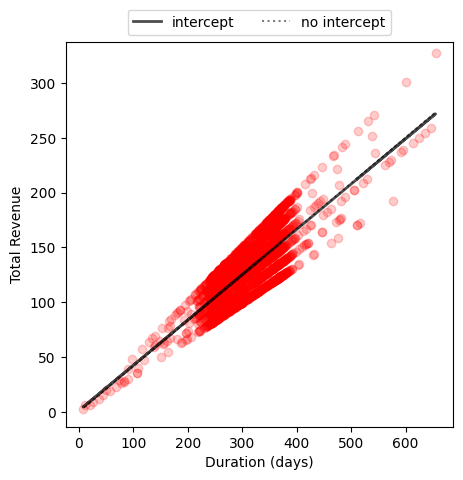

In [965]:
#-- Relationship b/t duration in days and total revenue with and without an intercept
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(netflix["Duration (days)"], netflix["Total Revenue"], color='r', alpha=0.20)
ax.plot(netflix["Duration (days)"], smOLS_int.predict(), color='black', label="intercept", alpha=0.70, linewidth=2)
ax.plot(netflix["Duration (days)"], smOLS.predict(), color='black', label="no intercept",  linestyle=":", alpha=0.50, linewidth=1.5)
ax.set_xlabel('Duration (days)')
ax.set_ylabel('Total Revenue')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=False, ncol=2)
plt.ylim(top=netflix['Total Revenue'].max()+10)
plt.show()

In [966]:
netflix_cleaned = netflix.drop(columns=['Join Date','Last Payment Date', 'Age Group'])

In [967]:
netflix_cleaned.head()

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Total Revenue,User Status
0,1,0,10,9,28,1,2,0,511,17.033333,170.333333,0
1,2,1,15,2,35,0,3,0,655,21.833333,327.500000,0
2,3,2,12,8,42,1,1,0,119,3.966667,47.600000,1
3,4,2,12,0,51,0,0,0,351,11.700000,140.400000,0
4,5,0,10,4,33,1,2,0,58,1.933333,19.333333,1


Linear Regression to Predict Total Revenue, but Different Approach

In [968]:
sklOLS = LinearRegression()
model = sklOLS.fit(netflix_cleaned[["Duration (days)"]], netflix["Total Revenue"])

print('Intercept: ', sklOLS.intercept_)
print('Coefficient: ', sklOLS.coef_)

Intercept:  1.2059364337303293
Coefficient:  [0.41301361]


In [969]:
indep_vars = [i for i in netflix_cleaned.columns if i != 'Total Revenue']
dep_var = 'Total Revenue'
X = netflix_cleaned[indep_vars]
y = netflix_cleaned[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   netflix_cleaned["Total Revenue"],
   test_size= 0.2,
   random_state=0)


In [970]:
sklOLS_train = LinearRegression().fit(X_train, y_train)
print(sklOLS_train.score(X_train, y_train)) #-- R2
print(sklOLS_train.score(X_test, y_test)) #-- R2


0.9861129604631487
0.9877905666463833


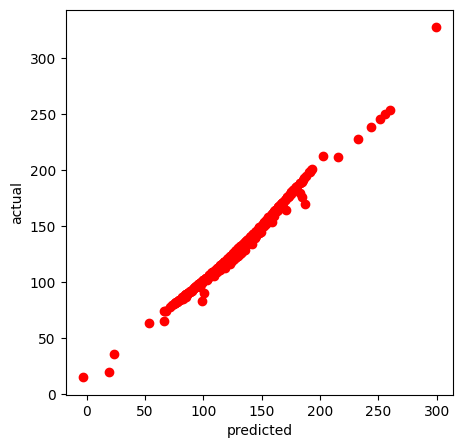

In [971]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.scatter(sklOLS_train.predict(X_test), y_test, color='r')
plt.show()

Decision Tree of User Status

In [972]:
indep_vars = [i for i in netflix_cleaned.columns if i not in ['User Status','User ID', 'Duration (days)', 'Duration (months)','Total Revenue']]
dep_var = 'User Status'
X = netflix_cleaned[indep_vars]
y = netflix_cleaned[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)

In [973]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.984
0.99


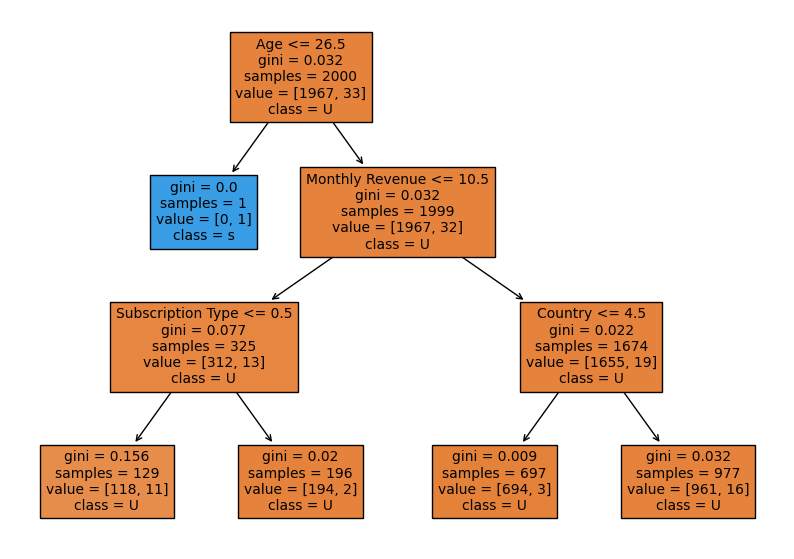

In [974]:
from sklearn import tree
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = "User Status", filled = True)
plt.show()

Which Subscription Type Has The Most Number of Expired/Active Users?

In [975]:
netflix_cleaned["User Status"].value_counts()

0    2462
1      38
Name: User Status, dtype: int64

In [976]:
expired = netflix_cleaned.groupby('Subscription Type')['User Status'].value_counts()
expired

Subscription Type  User Status
0                  0              982
                   1               17
1                  0              722
                   1               11
2                  0              758
                   1               10
Name: User Status, dtype: int64

Decision Tree of Subscription Type

In [977]:
indep_vars = [i for i in netflix_cleaned.columns if i != 'Subscription Type']
dep_var = 'Subscription Type'
X = netflix_cleaned[indep_vars]
y = netflix_cleaned[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)

In [978]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.597
0.576


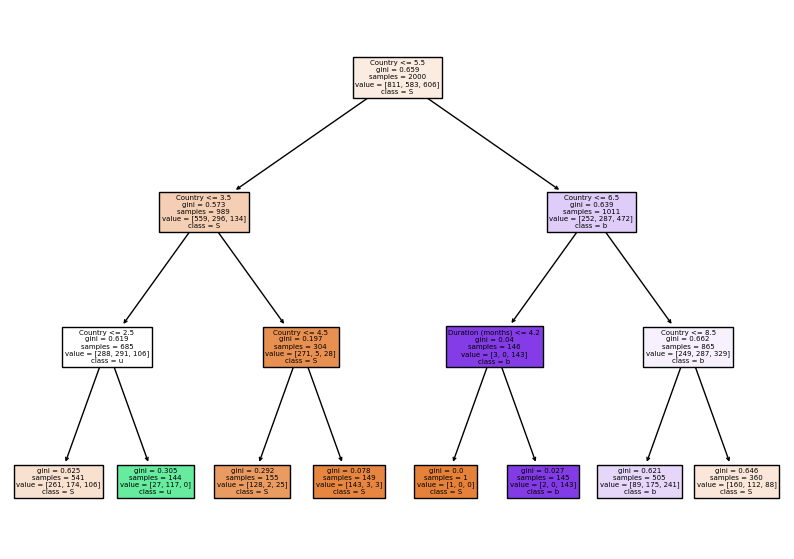

In [979]:
from sklearn import tree
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = "Subscription Type", filled = True)
plt.show()

In [980]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1","Predicted 2"], index=["True 0", "True 1","True 2"])
cm

,Predicted 0,Predicted 1,Predicted 2
True 0,154,9,25
True 1,83,30,37
True 2,58,0,104


In [981]:
precision0 = cm.loc["True 0", "Predicted 0"] / cm["Predicted 0"].sum()
recall0 = cm.loc["True 0", "Predicted 0"] / cm.loc["True 0"].sum()
precision1 = cm.loc["True 1", "Predicted 1"] / cm["Predicted 1"].sum()
recall1 = cm.loc["True 1", "Predicted 1"] / cm.loc["True 1"].sum()
precision2 = cm.loc["True 2", "Predicted 2"] / cm["Predicted 2"].sum()
recall2 = cm.loc["True 2", "Predicted 2"] / cm.loc["True 2"].sum()
print("Recall0: ", str(round(100*recall0, 2))+"%")
print("Precision0: ", str(round(100*precision0, 2))+"%")
print("Recall1: ", str(round(100*recall1, 2))+"%")
print("Precision1: ", str(round(100*precision1, 2))+"%")
print("Recall2: ", str(round(100*recall2, 2))+"%")
print("Precision2: ", str(round(100*precision2, 2))+"%")

Recall0:  81.91%
Precision0:  52.2%
Recall1:  20.0%
Precision1:  76.92%
Recall2:  64.2%
Precision2:  62.65%


Decision Tree of Gender

In [982]:
indep_vars = [i for i in netflix_cleaned.columns if i != 'Gender']
dep_var = 'Gender'
X = netflix_cleaned[indep_vars]
y = netflix_cleaned[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)


model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5485
0.512


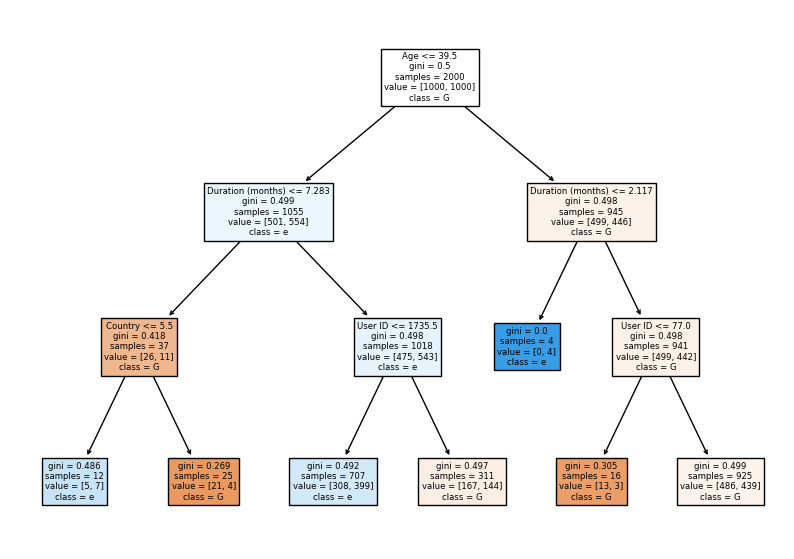

In [983]:
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = "Gender", filled = True)
plt.show()

In [984]:
y_pred = model.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
cm2= pd.DataFrame(cm2, columns=["Predicted 0", "Predicted 1"], index=["True 0", "True 1"])
cm2

,Predicted 0,Predicted 1
True 0,164,93
True 1,151,92


In [985]:
precision0 = cm2.loc["True 0", "Predicted 0"] / cm2["Predicted 0"].sum()
recall0 = cm2.loc["True 0", "Predicted 0"] / cm2.loc["True 0"].sum()
precision1 = cm2.loc["True 1", "Predicted 1"] / cm2["Predicted 1"].sum()
recall1 = cm2.loc["True 1", "Predicted 1"] / cm2.loc["True 1"].sum()

print("Recall0: ", str(round(100*recall0, 2))+"%")
print("Precision0: ", str(round(100*precision0, 2))+"%")
print("Recall1: ", str(round(100*recall1, 2))+"%")
print("Precision1: ", str(round(100*precision1, 2))+"%")


Recall0:  63.81%
Precision0:  52.06%
Recall1:  37.86%
Precision1:  49.73%


Decision Treee of Device Type

In [986]:
indep_vars = [i for i in netflix_cleaned.columns if i != 'Device']
dep_var = 'Device'
X = netflix_cleaned[indep_vars]
y = netflix_cleaned[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)


model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.2845
0.224


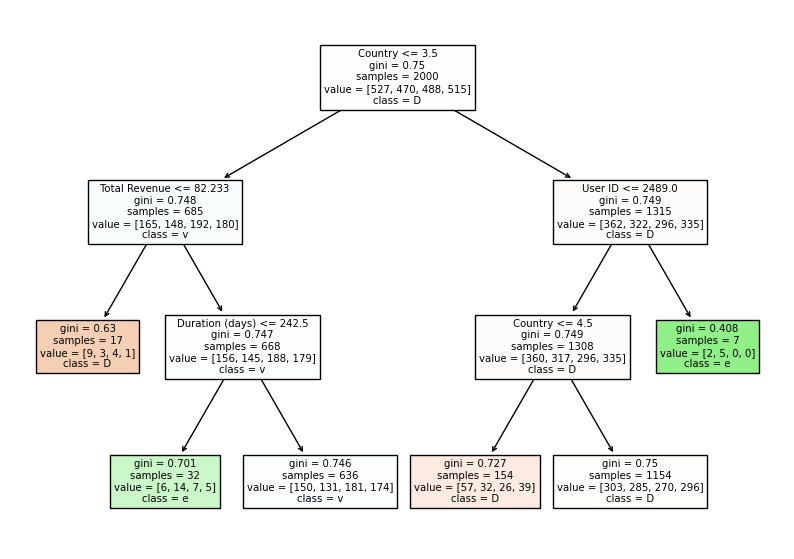

In [987]:
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = "Device", filled = True)
plt.show()